In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.externals.six import StringIO  
from sklearn import preprocessing
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

pd.options.display.max_rows = 4000
plt.style.use('ggplot')
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


<b>Read Data</b>

In [2]:
train_data_path='C:/Users/karim.afifi/Desktop/ASU/Data Visualization (CSE578)/Projects/adult.csv'
test_data_path='C:/Users/karim.afifi/Desktop/ASU/Data Visualization (CSE578)/Projects/adult_test.csv'

In [3]:
train_data=pd.read_csv(train_data_path, na_values='?')
test_data=pd.read_csv(test_data_path, na_values='?')

In [4]:
train_data.shape

(32561, 15)

In [5]:
train_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object

In [6]:
train_data['education-num']=train_data['education-num'].astype('str')
test_data['education-num']=test_data['education-num'].astype('str')

In [7]:
train_data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Income               0
dtype: int64

<b>Univariate Analysis</b>

In [8]:
train_data['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

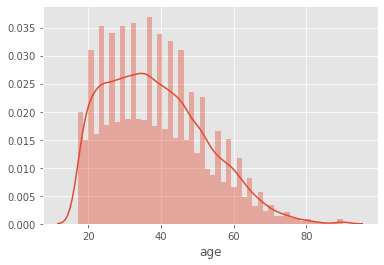

In [9]:
sns.distplot(train_data['age'])

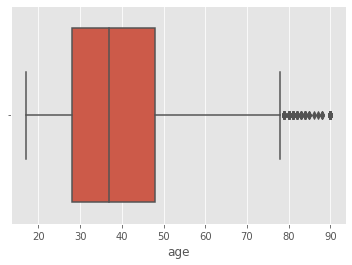

In [10]:
sns.boxplot(train_data['age'])

<b>Data is right skewed towards the younger age. Minimum age for individuals is 17, maximum age is 20 and 50% of individuals are less than 37 years</b>

In [11]:
train_data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [12]:
(train_data['workclass'].value_counts()/train_data['workclass'].value_counts().sum())*100

Private             73.868186
Self-emp-not-inc     8.270138
Local-gov            6.812042
State-gov            4.224573
Self-emp-inc         3.632221
Federal-gov          3.124491
Without-pay          0.045566
Never-worked         0.022783
Name: workclass, dtype: float64

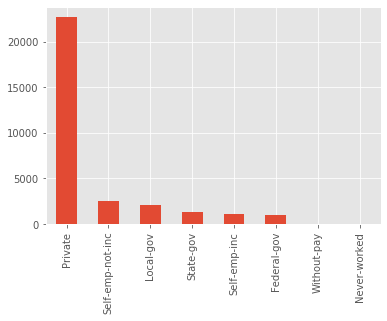

In [13]:
train_data['workclass'].value_counts().plot.bar()

<b>Most of the individuals are private work class with a wide margin</b>

In [14]:
train_data['fnlwgt'].describe().astype(int)

count      32561
mean      189778
std       105549
min        12285
25%       117827
50%       178356
75%       237051
max      1484705
Name: fnlwgt, dtype: int32

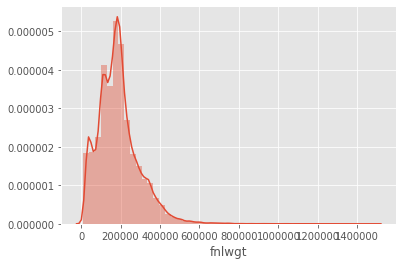

In [15]:
sns.distplot(train_data['fnlwgt'])

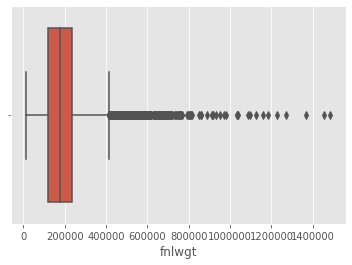

In [16]:
sns.boxplot(train_data['fnlwgt'])

In [17]:
train_data['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [18]:
(train_data['education'].value_counts()/train_data['education'].value_counts().sum())*100

HS-grad         32.250238
Some-college    22.391818
Bachelors       16.446055
Masters          5.291607
Assoc-voc        4.244341
11th             3.608612
Assoc-acdm       3.276926
10th             2.865391
7th-8th          1.983969
Prof-school      1.768987
9th              1.578576
12th             1.329812
Doctorate        1.268389
5th-6th          1.022696
1st-4th          0.515955
Preschool        0.156629
Name: education, dtype: float64

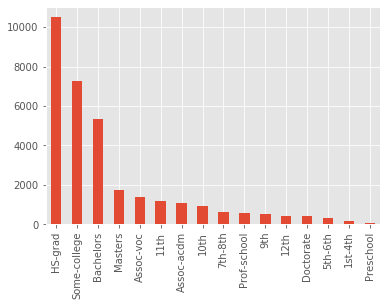

In [19]:
train_data['education'].value_counts().plot.bar()

<b>Most of the individuals are HS-grads.76% of individuals are HS-grad, Some-college, Bachelors and Masters</b>

In [20]:
train_data['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

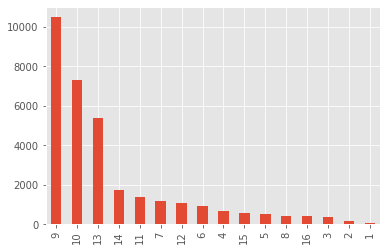

In [21]:
train_data['education-num'].value_counts().plot.bar()

<b>Education and education-num are redundant</b>

In [22]:
train_data['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [23]:
(train_data['marital-status'].value_counts()/train_data['marital-status'].value_counts().sum())*100

Married-civ-spouse       45.993673
Never-married            32.809189
Divorced                 13.645158
Separated                 3.147938
Widowed                   3.049661
Married-spouse-absent     1.283744
Married-AF-spouse         0.070637
Name: marital-status, dtype: float64

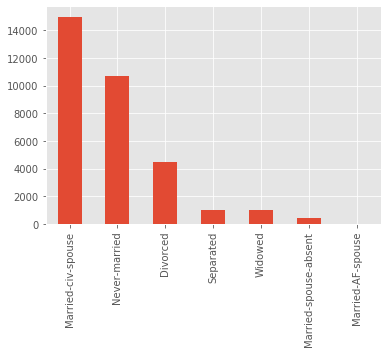

In [24]:
train_data['marital-status'].value_counts().plot.bar()

<b>Most of the individuals are Married-civ-spouse. 93% of individuals are Married-civ-spouse or Never-married or Divorced</b>

In [25]:
train_data['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [26]:
(train_data['occupation'].value_counts()/train_data['occupation'].value_counts().sum())*100

Prof-specialty       13.477440
Craft-repair         13.343968
Exec-managerial      13.236539
Adm-clerical         12.272934
Sales                11.882284
Other-service        10.726610
Machine-op-inspct     6.517351
Transport-moving      5.198906
Handlers-cleaners     4.459926
Farming-fishing       3.235888
Tech-support          3.021030
Protective-serv       2.112768
Priv-house-serv       0.485058
Armed-Forces          0.029299
Name: occupation, dtype: float64

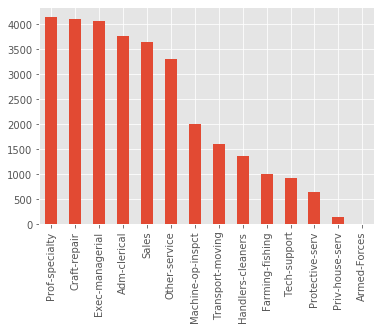

In [27]:
train_data['occupation'].value_counts().plot.bar()

In [28]:
train_data['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [29]:
(train_data['relationship'].value_counts()/train_data['relationship'].value_counts().sum())*100

Husband           40.517797
Not-in-family     25.505973
Own-child         15.564633
Unmarried         10.583213
Wife               4.815577
Other-relative     3.012807
Name: relationship, dtype: float64

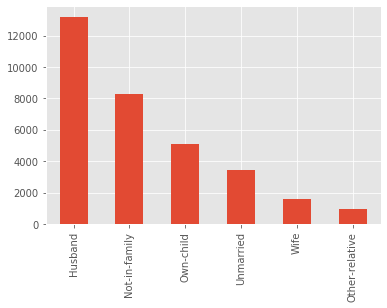

In [30]:
train_data['relationship'].value_counts().plot.bar()

<b>Most of the individuals are husbands followed by no-in-family</b>

In [31]:
train_data['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [32]:
(train_data['race'].value_counts()/train_data['race'].value_counts().sum())*100

White                 85.427352
Black                  9.594300
Asian-Pac-Islander     3.190934
Amer-Indian-Eskimo     0.955130
Other                  0.832284
Name: race, dtype: float64

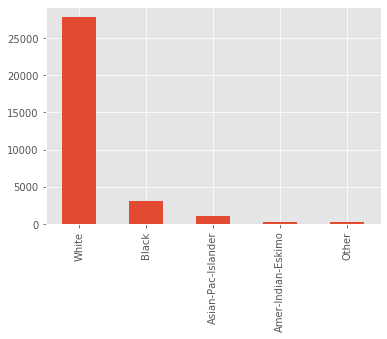

In [33]:
train_data['race'].value_counts().plot.bar()

<b>Most of the individuals are white</b>

In [34]:
train_data['capital-gain'].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

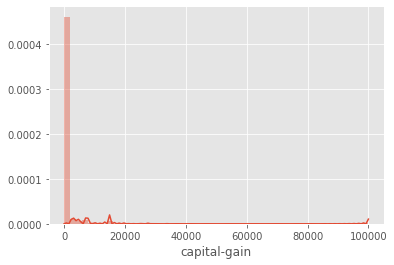

In [35]:
sns.distplot(train_data['capital-gain'])

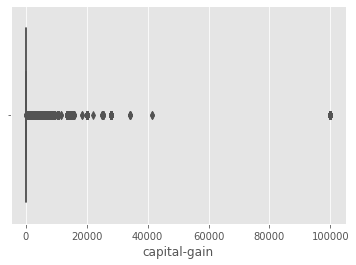

In [36]:
sns.boxplot(train_data['capital-gain'])

<b>Most of the capital gains are 0 which might require converting the variable to categories</b>

In [37]:
train_data[train_data['capital-gain']!=0]['capital-gain'].describe()

count     2712.000000
mean     12938.541298
std      22395.413530
min        114.000000
25%       3411.000000
50%       7298.000000
75%      14084.000000
max      99999.000000
Name: capital-gain, dtype: float64

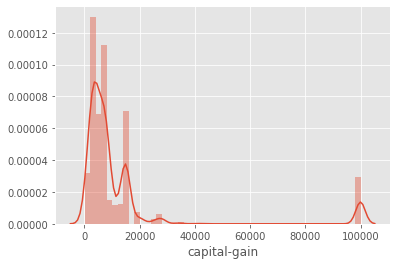

In [38]:
sns.distplot(train_data[train_data['capital-gain']!=0]['capital-gain'])

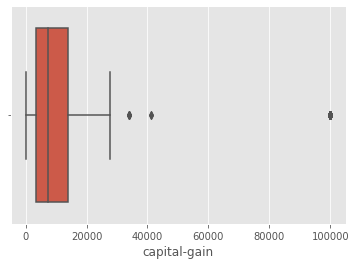

In [39]:
sns.boxplot(train_data[train_data['capital-gain']!=0]['capital-gain'])

In [40]:
train_data['capital-gain'].mean()

1077.6488437087312

In [41]:
train_data['capital-loss'].describe()

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

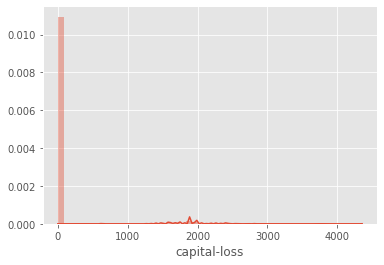

In [42]:
sns.distplot(train_data['capital-loss'])

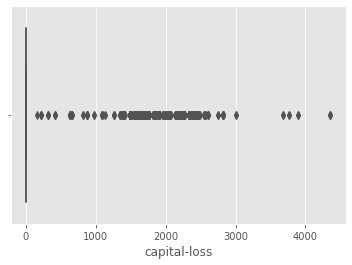

In [43]:
sns.boxplot(train_data['capital-loss'])

<b>Most of the capital losses are 0 which might require converting the variable into categories</b>

In [44]:
train_data[train_data['capital-loss']!=0]['capital-loss'].describe()

count    1519.000000
mean     1871.428571
std       376.571535
min       155.000000
25%      1672.000000
50%      1887.000000
75%      1977.000000
max      4356.000000
Name: capital-loss, dtype: float64

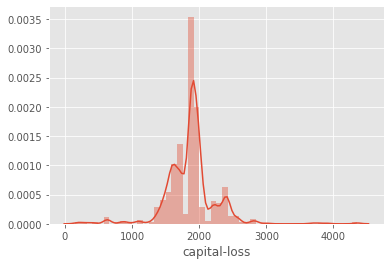

In [45]:
sns.distplot(train_data[train_data['capital-loss']!=0]['capital-loss'])

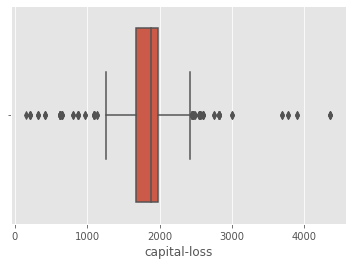

In [46]:
sns.boxplot(train_data[train_data['capital-loss']!=0]['capital-loss'])

In [47]:
train_data['hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

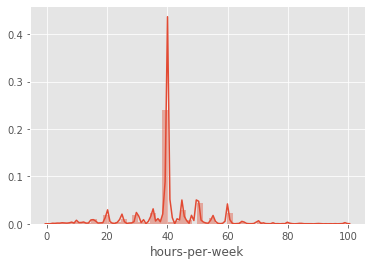

In [48]:
sns.distplot(train_data['hours-per-week'])

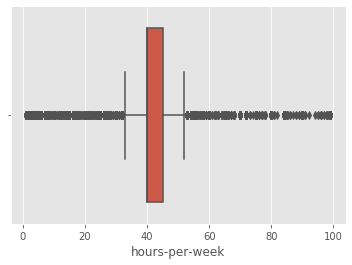

In [49]:
sns.boxplot(train_data['hours-per-week'])

<b>Most individuals work around 40 hours per week</b>

In [50]:
train_data['native-country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [51]:
(train_data['native-country'].value_counts()/train_data['native-country'].value_counts().sum())*100

United-States                 91.218963
Mexico                         2.010757
Philippines                    0.619176
Germany                        0.428420
Canada                         0.378385
Puerto-Rico                    0.356495
El-Salvador                    0.331478
India                          0.312715
Cuba                           0.297079
England                        0.281443
Jamaica                        0.253299
South                          0.250172
China                          0.234536
Italy                          0.228282
Dominican-Republic             0.218900
Vietnam                        0.209519
Guatemala                      0.200138
Japan                          0.193883
Poland                         0.187629
Columbia                       0.184502
Taiwan                         0.159485
Haiti                          0.137595
Iran                           0.134467
Portugal                       0.115705
Nicaragua                      0.106323


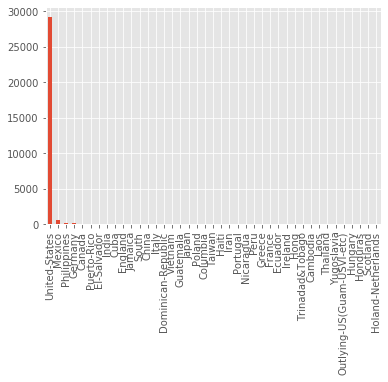

In [52]:
train_data['native-country'].value_counts().plot.bar()

<b>Most citizens are from United States by a wide margin</b>

In [53]:
train_data['Income'].value_counts()

<=50K    24720
>50K      7841
Name: Income, dtype: int64

In [54]:
(train_data['Income'].value_counts()/train_data['Income'].value_counts().sum())*100

<=50K    75.919044
>50K     24.080956
Name: Income, dtype: float64

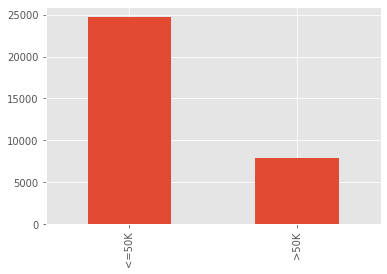

In [55]:
train_data['Income'].value_counts().plot.bar()

<b>We have a class imbalance here but we are going to see if that will cause a problem</b>

<hr>

<hr>

<hr>

<hr>

<b>Now lets see what variables are correlated with the target variable</b>

([<matplotlib.axis.YTick at 0x187f76bd388>,
 <a list of 21 Text yticklabel objects>)

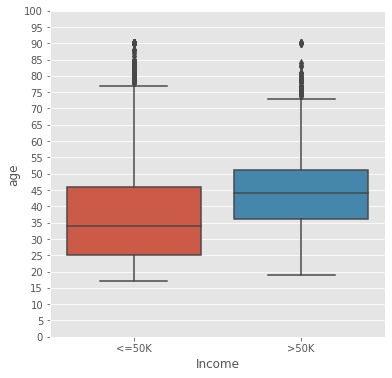

In [56]:
plt.figure(figsize=(6,6))
sns.boxplot(train_data['Income'], train_data['age'])
plt.yticks(list(range(0, 101, 5)))

In [57]:
train_data[train_data['Income']=='>50K']['age'].mean()

44.24984058155847

In [58]:
train_data[train_data['Income']=='<=50K']['age'].mean()

36.78373786407767

In [108]:
train_data[train_data['Income']=='>50K']['age'].max()

90

In [112]:
train_data[train_data['Income']=='<=50K']['age'].max()

90

<b>Older individuals tend to have higher income. All the quartiles for age are higher for the >50k income. Only 25% of individuals who make more than >50k are less than around 36. Age might be a good indicator for predicting income.</b>

In [59]:
wcct=pd.crosstab(train_data['workclass'], train_data['Income']).apply(lambda r: r/r.sum(), axis=1)*100
wcct.sort_values(by='>50K', ascending=False, inplace=True)
wcct

Income,<=50K,>50K
workclass,,
Self-emp-inc,44.265233,55.734767
Federal-gov,61.354167,38.645833
Local-gov,70.520784,29.479216
Self-emp-not-inc,71.507281,28.492719
State-gov,72.804314,27.195686
Private,78.132711,21.867289
Never-worked,100.000000,0.000000
Without-pay,100.000000,0.000000


([<matplotlib.axis.YTick at 0x187f8778148>,
 <a list of 11 Text yticklabel objects>)

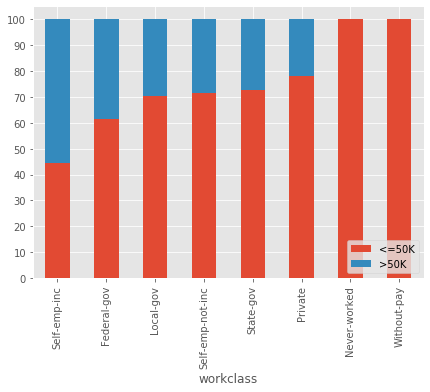

In [60]:
wcct.plot.bar(stacked=True, figsize=(7, 5))
plt.legend(loc='lower right')
plt.yticks(list(range(0, 101, 10)))

<b>self-emp-inc (incorporated. self-employed individuals who set their businesses up as a corporation for tax purposes) have the highest percentage of >50k income followed by federal-gov, etc. Workclass might be a good indicator for predicting income as the percentage of >50k varies depending on the workclass</b>

([<matplotlib.axis.YTick at 0x187f882f548>,
 <a list of 16 Text yticklabel objects>)

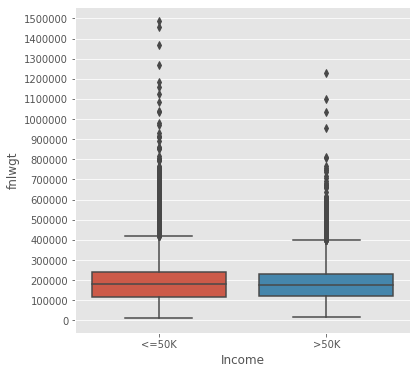

In [61]:
plt.figure(figsize=(6,6))
sns.boxplot(train_data['Income'], train_data['fnlwgt'])
plt.yticks(list(range(0, 1500001, 100000)))

In [62]:
train_data[train_data['Income']=='>50K']['fnlwgt'].median()

176101.0

In [63]:
train_data[train_data['Income']=='<=50K']['fnlwgt'].median()

179465.0

<b>fnlwgt does not seem to be a good variable for predicting income as the quartiles and the box plot is nearly equal</b>

In [64]:
edct=pd.crosstab(train_data['education'], train_data['Income']).apply(lambda r: r/r.sum(), axis=1)*100
edct.sort_values(by='>50K', ascending=False, inplace=True)
edct

Income,<=50K,>50K
education,,
Doctorate,25.907990,74.092010
Prof-school,26.562500,73.437500
Masters,44.341265,55.658735
Bachelors,58.524743,41.475257
Assoc-voc,73.878437,26.121563
Assoc-acdm,75.164011,24.835989
Some-college,80.976546,19.023454
HS-grad,84.049138,15.950862
12th,92.378753,7.621247


([<matplotlib.axis.YTick at 0x187f88ce6c8>,
 <a list of 11 Text yticklabel objects>)

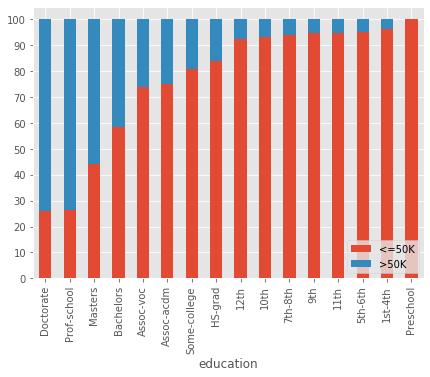

In [65]:
edct.plot.bar(stacked=True, figsize=(7, 5))
plt.legend(loc='lower right')
plt.yticks(list(range(0, 101, 10)))

<b>Education seems to play a big role in determing the income of an individual. The higher the degree, the more likely is the income</b>

In [66]:
msct=pd.crosstab(train_data['marital-status'], train_data['Income']).apply(lambda r: r/r.sum(), axis=1)*100
msct.sort_values(by='>50K', ascending=False, inplace=True)
msct

Income,<=50K,>50K
marital-status,,
Married-civ-spouse,55.315171,44.684829
Married-AF-spouse,56.521739,43.478261
Divorced,89.579113,10.420887
Widowed,91.440081,8.559919
Married-spouse-absent,91.866029,8.133971
Separated,93.560976,6.439024
Never-married,95.403913,4.596087


([<matplotlib.axis.YTick at 0x187f89c2288>,
 <a list of 11 Text yticklabel objects>)

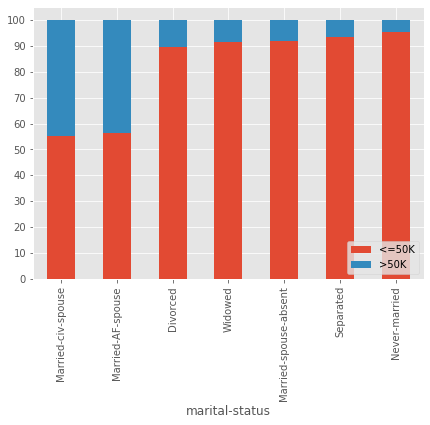

In [67]:
msct.plot.bar(stacked=True, figsize=(7, 5))
plt.legend(loc='lower right')
plt.yticks(list(range(0, 101, 10)))

<b>Married-civ-spouse and Married-AF-spouse (civilian and armed forces married spouses) have high percentage of >50k. Might also be a good variable for predicting income!</b>

In [68]:
ocpct=pd.crosstab(train_data['occupation'], train_data['Income']).apply(lambda r: r/r.sum(), axis=1)*100
ocpct.sort_values(by='>50K', ascending=False, inplace=True)
ocpct

Income,<=50K,>50K
occupation,,
Exec-managerial,51.598623,48.401377
Prof-specialty,55.096618,44.903382
Protective-serv,67.488444,32.511556
Tech-support,69.504310,30.495690
Sales,73.068493,26.931507
Craft-repair,77.335936,22.664064
Transport-moving,79.962430,20.037570
Adm-clerical,86.551724,13.448276
Machine-op-inspct,87.512488,12.487512


([<matplotlib.axis.YTick at 0x187f8a69c48>,
 <a list of 11 Text yticklabel objects>)

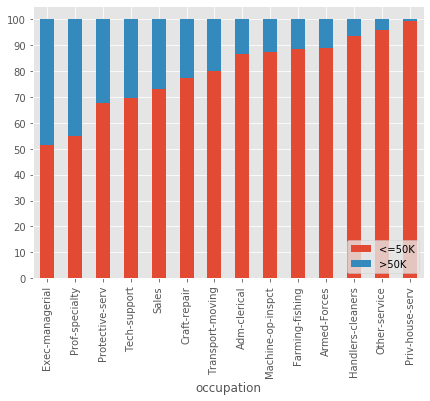

In [69]:
ocpct.plot.bar(stacked=True, figsize=(7, 5))
plt.legend(loc='lower right')
plt.yticks(list(range(0, 101, 10)))

<b>Executive and managerial level have the highest percentage of >50k followed by prof-speciality then protective service occupations, etc. This variable might also be good predictor for income since income varies depending on the occupation</b>

In [70]:
rppct=pd.crosstab(train_data['relationship'], train_data['Income']).apply(lambda r: r/r.sum(), axis=1)*100
rppct.sort_values(by='>50K', ascending=False, inplace=True)
rppct

Income,<=50K,>50K
relationship,,
Wife,52.487245,47.512755
Husband,55.142879,44.857121
Not-in-family,89.692956,10.307044
Unmarried,93.673825,6.326175
Other-relative,96.228338,3.771662
Own-child,98.677979,1.322021


([<matplotlib.axis.YTick at 0x187f8b3a348>,
 <a list of 11 Text yticklabel objects>)

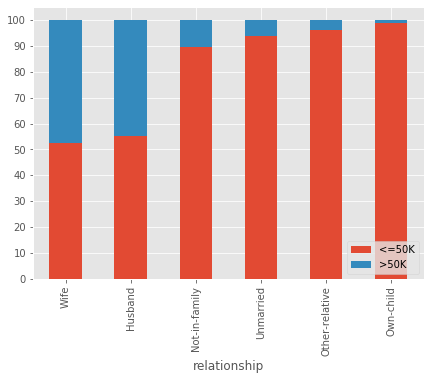

In [71]:
rppct.plot.bar(stacked=True, figsize=(7, 5))
plt.legend(loc='lower right')
plt.yticks(list(range(0, 101, 10)))

<b>Married individuals whether a wife or a husband are more likely to have make >50k. This variable might also be good for predicting income.</b>

In [72]:
racct=pd.crosstab(train_data['race'], train_data['Income']).apply(lambda r: r/r.sum(), axis=1)*100
racct.sort_values(by='>50K', ascending=False, inplace=True)
racct

Income,<=50K,>50K
race,,
Asian-Pac-Islander,73.435996,26.564004
White,74.414006,25.585994
Black,87.612036,12.387964
Amer-Indian-Eskimo,88.424437,11.575563
Other,90.774908,9.225092


([<matplotlib.axis.YTick at 0x187f8bd8788>,
 <a list of 11 Text yticklabel objects>)

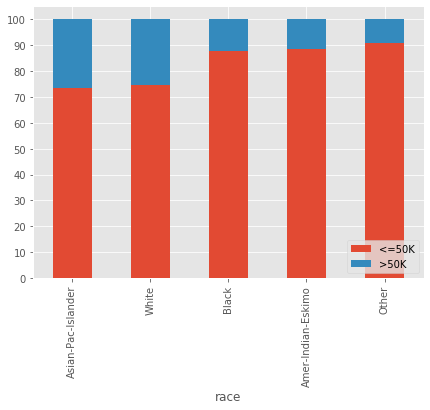

In [73]:
racct.plot.bar(stacked=True, figsize=(7, 5))
plt.legend(loc='lower right')
plt.yticks(list(range(0, 101, 10)))

<b>Asian-Pac-Islander and White individuals are more likely to make >50k than other races. This variable might not be a good indicator for predicting income.</b>

In [74]:
sxct=pd.crosstab(train_data['sex'], train_data['Income']).apply(lambda r: r/r.sum(), axis=1)*100
sxct.sort_values(by='>50K', ascending=False, inplace=True)
sxct

Income,<=50K,>50K
sex,,
Male,69.426342,30.573658
Female,89.053941,10.946059


([<matplotlib.axis.YTick at 0x187f8c73e08>,
 <a list of 11 Text yticklabel objects>)

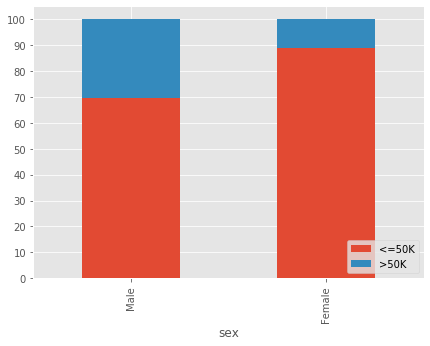

In [75]:
sxct.plot.bar(stacked=True, figsize=(7, 5))
plt.legend(loc='lower right')
plt.yticks(list(range(0, 101, 10)))

<b>Sex might also be a good indicator for predicting income. More males make >50k than females.</b>

([<matplotlib.axis.YTick at 0x187f8cff948>,
 <a list of 11 Text yticklabel objects>)

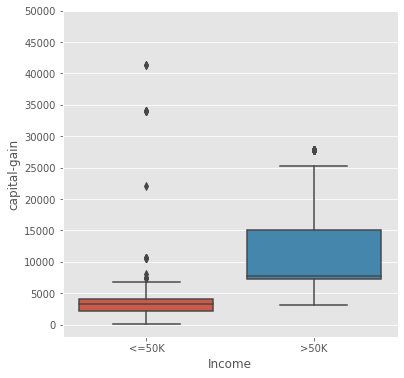

In [76]:
temp_df=train_data[['capital-gain', 'Income']]
temp_df=temp_df[(temp_df['capital-gain']!=0) & (temp_df['capital-gain']!=99999)]
plt.figure(figsize=(6,6))
sns.boxplot(temp_df['Income'], temp_df['capital-gain'])
plt.yticks(list(range(0, 50001, 5000)))

<b>While 0 is an issue that needs to be solved, capital gains is a good indicator for income. The higher the capital-gains, the higher the income.</b>

([<matplotlib.axis.YTick at 0x187f8d86108>,
 <a list of 10 Text yticklabel objects>)

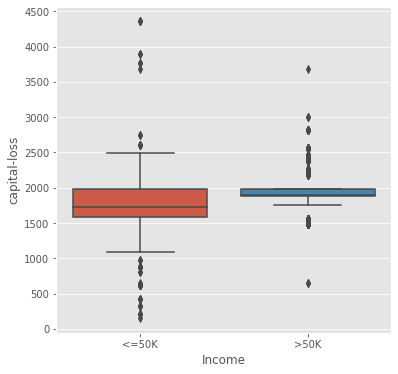

In [77]:
temp_df=train_data[['capital-loss', 'Income']]
temp_df=temp_df[temp_df['capital-loss']!=0]
plt.figure(figsize=(6,6))
sns.boxplot(temp_df['Income'], temp_df['capital-loss'])
plt.yticks(list(range(0, 4501, 500)))

<b>While 0 is an issue that needs to be solved, capital loss is a good indicator for income. The higher the capital-loss, the higher the income.</b>

([<matplotlib.axis.YTick at 0x187f8cd5588>,
 <a list of 11 Text yticklabel objects>)

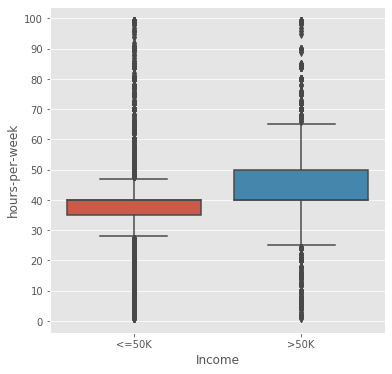

In [78]:
plt.figure(figsize=(6,6))
sns.boxplot(train_data['Income'], train_data['hours-per-week'])
plt.yticks(list(range(0, 101, 10)))

<b>Individuals who work more per week tend to have higher percentage of >50k. This also might be a good indicator for predicting income</b>

In [79]:
ncct=pd.crosstab(train_data['native-country'], train_data['Income']).apply(lambda r: r/r.sum(), axis=1)*100
ncct.sort_values(by='>50K', ascending=False, inplace=True)
ncct

Income,<=50K,>50K
native-country,,
Iran,58.139535,41.860465
France,58.620690,41.379310
India,60.000000,40.000000
Taiwan,60.784314,39.215686
Japan,61.290323,38.709677
Yugoslavia,62.500000,37.500000
Cambodia,63.157895,36.842105
Italy,65.753425,34.246575
England,66.666667,33.333333


([<matplotlib.axis.YTick at 0x187f8e97d88>,
 <a list of 11 Text yticklabel objects>)

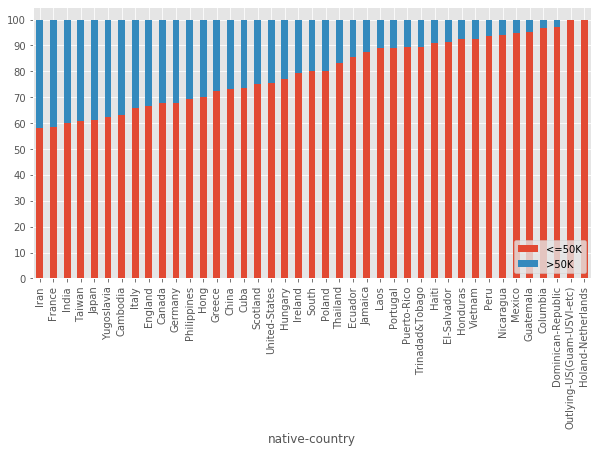

In [80]:
ncct.plot.bar(stacked=True, figsize=(10, 5))
plt.legend(loc='lower right')
plt.yticks(list(range(0, 101, 10)))

<b>Individuals from Iran and France have the highest percentage of >50k. It is also apparent that the income varies between different individuals from different native countries. native-country might be a good indicator for predicting income</b>

<b>Predicting using Gradient Boosting</b>

In [81]:
#train_data.dropna(axis=0, inplace=True)
#test_data.dropna(axis=0, inplace=True)

In [82]:
#X_train=train_data.iloc[:,:-1]
#y_train=train_data.iloc[:,-1]

In [83]:
#X_test=test_data.iloc[:,:-1]
#y_test=test_data.iloc[:,-1]

In [84]:
#X_train.drop(['education'], axis=1, inplace=True)

In [85]:
#X_test.drop(['education'], axis=1, inplace=True)

In [86]:
#X_train_temp=pd.DataFrame()
#for (columnName, columnData) in X_train.iteritems():
#    le = preprocessing.LabelEncoder()
#    X_train_temp[columnName]=le.fit_transform(columnData)
#X_train=X_train_temp
#del X_train_temp

In [87]:
#X_test_temp=pd.DataFrame()
#for (columnName, columnData) in X_test.iteritems():
#    le = preprocessing.LabelEncoder()
#    X_test_temp[columnName]=le.fit_transform(columnData)
#X_test=X_test_temp
#del X_test_temp

In [88]:
#le = preprocessing.LabelEncoder()
#y_train=le.fit_transform(y_train)

In [89]:
#le = preprocessing.LabelEncoder()
#y_test=le.fit_transform(y_test)

In [90]:
#est = DecisionTreeClassifier()
#param_grid = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'min_samples_split': [2, 3], 'min_samples_leaf': [1, 2], 'max_features': ['auto', 'sqrt', 'log2']}
#gs_class = GridSearchCV(est, param_grid, n_jobs=-1, verbose=0, cv=5, scoring='balanced_accuracy')
#res_cv=gs_class.fit(X_train, y_train)

In [91]:
#res_cv.best_params_

In [92]:
#est = DecisionTreeClassifier(criterion= 'entropy', max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 2, splitter= 'best')
#est.fit(X_train, y_train)

In [93]:
#y_train_predict=est.predict(X_train)
#balanced_accuracy_score(y_train, y_train_predict)

In [94]:
#bacc_cv=cross_val_score(est, X_train, y_train, cv=5, scoring='balanced_accuracy')
#print(bacc_cv)
#print(np.average(bacc_cv))

In [95]:
#y_test_predict=est.predict(X_test)
#balanced_accuracy_score(y_test, y_test_predict)

In [96]:
#fi_df = pd.DataFrame({'Variable': X_train.columns, 'Importance': est.feature_importances_*100})
#fi_df.sort_values('Importance', axis=0, ascending=False, inplace=True)

In [97]:
#plt.figure(figsize=(6,6))
#plt.title('GB Feature Importance', fontsize=15, pad=12)
#sns.barplot(fi_df['Variable'], fi_df['Importance'])
#plt.xticks(rotation=90)

In [98]:
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus
#
#dot_data = StringIO()
#export_graphviz(est, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

In [99]:
#est = ensemble.GradientBoostingClassifier()
#param_grid = {'n_estimators': [300, 400, 500], 'max_depth': [3, 4], 'min_samples_split': [2, 3, 4], \
#          'learning_rate': [0.01, 0.05, 0.1], 'subsample': [1.0], 'max_features': ['auto', 'sqrt', None]}
#gs_class = GridSearchCV(est, param_grid, n_jobs=-1, verbose=0, cv=5, scoring='balanced_accuracy')
#res_cv=gs_class.fit(X_train, y_train)

In [100]:
#res_cv.best_params_

In [101]:
#{'learning_rate': 0.1,
# 'max_depth': 4,
# 'max_features': 'auto',
# 'min_samples_split': 3,
# 'n_estimators': 500,
# 'subsample': 1.0}

In [102]:
#est = ensemble.GradientBoostingClassifier(learning_rate= 0.1, max_depth= 4, max_features= 'auto', min_samples_split= 3, n_estimators= 600, subsample= 1.0)
#est.fit(X_train, y_train)

In [103]:
#y_train_predict=est.predict(X_train)
#balanced_accuracy_score(y_train, y_train_predict)

In [104]:
#bacc_cv=cross_val_score(est, X_train, y_train, cv=5, scoring='balanced_accuracy')
#print(bacc_cv)
#print(np.average(bacc_cv))

In [105]:
#y_test_predict=est.predict(X_test)
#balanced_accuracy_score(y_test, y_test_predict)

In [106]:
#fi_df = pd.DataFrame({'Variable': X_train.columns, 'Importance': est.feature_importances_*100})
#fi_df.sort_values('Importance', axis=0, ascending=False, inplace=True)

In [107]:
#plt.figure(figsize=(6,6))
#plt.title('GB Feature Importance', fontsize=15, pad=12)
#sns.barplot(fi_df['Variable'], fi_df['Importance'])
#plt.xticks(rotation=90)